# Introduction
In this notebook, we will learn and work with the fundamentals of 2D linear transformations. First, we'll draw a basic face, including the head, eyes, nose, and mouth. The location and contour of the face will then be altered as we experiment with various transformations, such as translation, scaling, and rotation. By the end, you'll understand how any set of coordinates in two dimensions may be transformed using matrix multiplication and vector addition.

## 1. Setup

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Make plots appear inline in the notebook
%matplotlib inline


## 2. Basic NumPy Operations


In [7]:
# Create a 1D array
arr_1d = np.array([1, 2, 3, 4, 5])
print("1D array:", arr_1d)

# Create a 2D array (matrix)
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6]])
print("2D array (matrix):\n", arr_2d)

# Slicing examples
print("First row of arr_2d:", arr_2d[0, :])
print("Second column of arr_2d:", arr_2d[:, 1])

# Element-wise operations
print("arr_2d * 2:\n", arr_2d * 2)

# Matrix multiplication
mat_A = np.array([[1, 2],
                  [3, 4]])
mat_B = np.array([[5, 6],
                  [7, 8]])
print("Matrix multiplication A * B:\n", mat_A @ mat_B)


1D array: [1 2 3 4 5]
2D array (matrix):
 [[1 2 3]
 [4 5 6]]
First row of arr_2d: [1 2 3]
Second column of arr_2d: [2 5]
arr_2d * 2:
 [[ 2  4  6]
 [ 8 10 12]]
Matrix multiplication A * B:
 [[19 22]
 [43 50]]


### Explanation:

* `arr_1d` and `arr_2d` demonstrate creating arrays.
* `[row, col]` indexing is used to slice data from the 2D matrix.
* `*`with a scalar does element-wise scaling.
* `@` performs matrix multiplication.

## 3. Generating a Simple Face

We’ll define a function that returns the coordinates of a very simple “face.” The face will be made up of points representing eyes, a nose, and a mouth.

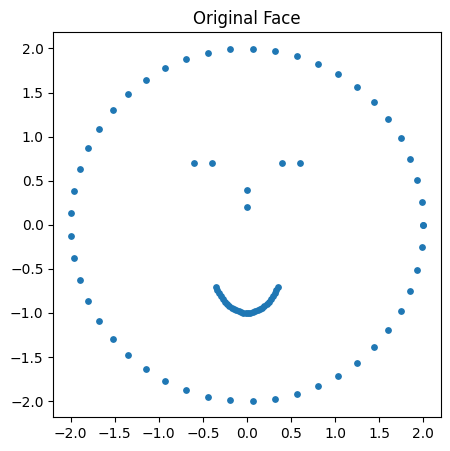

In [32]:
def generate_face():
    """
    Returns a NumPy array of shape (num_points, 2),
    containing x,y coordinates for a simple face.
    """
    # --- Outline (a circle-ish shape) ---
    theta = np.linspace(0, 2*np.pi, 50)
    head_x = 2 * np.cos(theta)
    head_y = 2 * np.sin(theta)

    # --- Eyes ---
    left_eye = np.array([[-0.6,  0.7],
                         [-0.4,  0.7]])
    right_eye = np.array([[ 0.4,  0.7],
                          [ 0.6,  0.7]])

    # --- Nose ---
    nose = np.array([[0.0, 0.4],
                     [0.0, 0.2]])

    # --- Mouth ---
    # This creates a mouth arc spanning from -π/4 to +π/4 (roughly -45° to +45°).
    # Increase or decrease these angles to make the mouth wider or narrower.
    mouth_theta = np.linspace(-np.pi/4, np.pi/4, 30)

    # Adjust these parameters to change mouth shape:
    mouth_radius   = 1.0   # how big the arc is in radius
    mouth_center_x = 0.0   # horizontal shift of the mouth
    mouth_center_y = 0.0  # vertical shift of the mouth (move it up/down)

    # Parametric equations for the arc
    mouth_x = mouth_center_x + mouth_radius * np.cos(mouth_theta)
    mouth_y = mouth_center_y + 0.5 * np.sin(mouth_theta)

    # --- Rotate the mouth ---
    rotation_angle = np.pi/2 # 90 degrees in radians
    rotation_matrix = np.array([
        [np.cos(rotation_angle), -np.sin(rotation_angle)],
        [np.sin(rotation_angle), np.cos(rotation_angle)]
    ])

    # Center the mouth points for rotation
    mouth_points = np.column_stack((mouth_x - mouth_center_x, mouth_y - mouth_center_y))

    # Apply rotation
    rotated_mouth_points = mouth_points @ rotation_matrix

    # Translate back to original position
    mouth_x = rotated_mouth_points[:, 0] + mouth_center_x
    mouth_y = rotated_mouth_points[:, 1] + mouth_center_y


    # --- Combine all points ---
    head  = np.column_stack((head_x,  head_y))
    mouth = np.column_stack((mouth_x, mouth_y))
    face_points = np.concatenate([head, left_eye, right_eye, nose, mouth], axis=0)

    return face_points

# Generate and plot
face_points = generate_face()

plt.figure(figsize=(5,5))
plt.scatter(face_points[:,0], face_points[:,1], s=15)
plt.axis('equal')
plt.title("Original Face")
plt.show()


## Step 4: Linear Transformations

### 4.1 Rotation
A 2D rotation by an angle $\theta$ (in radians) is given by the matrix:
$
R(\theta) =
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{pmatrix}.
$

In [26]:
def rotation_matrix(theta):
    """
    Returns a 2D rotation matrix for rotating points by angle theta (in radians).
    """
    return np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])


### 4.2 Scaling
Uniform scaling by a factor $s$ in both axes:
$
S(s) =
\begin{pmatrix}
s & 0 \\
0 & s
\end{pmatrix}.
$

Non-uniform scaling by $s_x$ and $s_y$:
$
S(s_x, s_y) =
\begin{pmatrix}
s_x & 0 \\
0 & s_y
\end{pmatrix}.
$


In [28]:
def scaling_matrix(sx, sy=None):
    """
    Returns a 2D scaling matrix. If sy is not specified, uniform scaling by sx.
    """
    if sy is None:
        sy = sx
    return np.array([
        [sx, 0],
        [0,  sy]
    ])


### 4.3 Non-uniform scaling by $s_x$ and $s_y$:
$
S(s_x, s_y) =
\begin{pmatrix}
s_x & 0 \\
0 & s_y
\end{pmatrix}.
$

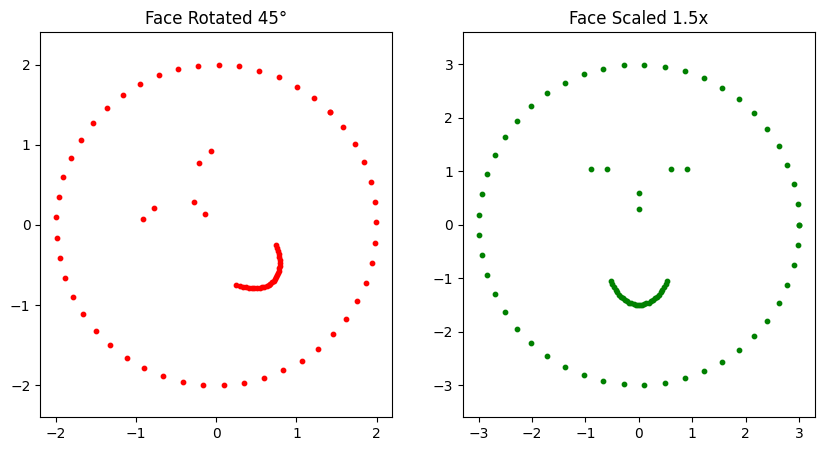

In [30]:
def transform_points(points, matrix):
    """
    Applies a 2x2 matrix transformation to an array of points of shape (N, 2).
    Returns the transformed points (N, 2).
    """
    return points @ matrix.T  # matrix.T because points are row vectors

# Example 1: Rotate the face by 45 degrees
theta_45 = np.radians(45)
rot_mat_45 = rotation_matrix(theta_45)
face_rotated_45 = transform_points(face_points, rot_mat_45)

# Example 2: Scale the face by a factor of 1.5 uniformly
scale_mat_15 = scaling_matrix(1.5)
face_scaled_15 = transform_points(face_points, scale_mat_15)

# Plot the original and transformed faces
fig, axes = plt.subplots(1, 2, figsize=(10,5))

axes[0].scatter(face_rotated_45[:,0], face_rotated_45[:,1], s=10, c='r')
axes[0].axis('equal')
axes[0].set_title("Face Rotated 45°")

axes[1].scatter(face_scaled_15[:,0], face_scaled_15[:,1], s=10, c='g')
axes[1].axis('equal')
axes[1].set_title("Face Scaled 1.5x")

plt.show()


### 4.4 Translation
Translation by $(t_x, t_y)$ adds those values to each point:
$
(x', y') = (x + t_x,\, y + t_y).
$

If you want a matrix form for translation, you typically use **homogeneous coordinates**:
$
\begin{pmatrix}
x' \\[6pt]
y' \\[6pt]
1
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x \\[4pt]
y \\[4pt]
1
\end{pmatrix}.
$

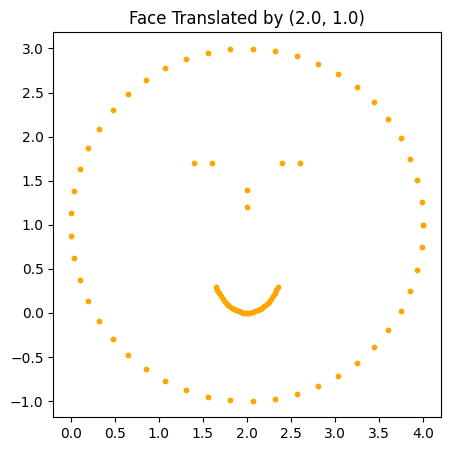

In [38]:
def translate_points(points, tx, ty):
    """
    Translates all points by (tx, ty).
    """
    translation_vector = np.array([tx, ty])
    return points + translation_vector

# Translate the face up and to the right
face_translated = translate_points(face_points, tx=2.0, ty=1.0)

plt.figure(figsize=(5,5))
plt.scatter(face_translated[:,0], face_translated[:,1], s=10, c='orange')
plt.axis('equal')
plt.title("Face Translated by (2.0, 1.0)")
plt.show()


# Conclusion

This exercise illustrates the beauty and elegance of linear algebra applied to manipulating 2D points. Because we represent our face as a collection of points transformations are simple, we  multiply by your rotation or scaling matrix or add a translation. Now that NumPy is doing the heavy lifting, you can start playing around with more complicated transformations, chaining them in various orders, or even working with higher-dimensional data in future projects.